<a href="https://colab.research.google.com/github/Sptfff/ADA-Informes/blob/main/Informe11_AlgoritmoKruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descripción del Problema

En los grafos el mayor problema que puede surgir es a la hora de conectar múltiples nodos, ya que existen diversas combinaciones entre estos, por lo que en caso de un grafo con una gran cantidad de nodos, la cantidad combinaciones ya excede la capacidad de cualquier procesador de resolverlo.

Uno de los nombres que recibe este problema es el de MST (*Minimum Spanning Tree*, *árbol recubridor mínimo*), que se basa en buscar la mejor conexión entre nodos, de forma que esta sea eficiente. Pero esto no es tan sencillo, por eso existen diversos algoritmos que solucionan este u otros problemas similares, como los que veremos a continuación. Aunque hay que considerar que no cualquier grafo puede cumplir con que sea *MST*, para que lo sea deber cumplir con una serie de propiedades:

**Entrada:** Grafo conectado no dirigido $G=(V,E)$ y un costo real $c_e$ para cara arco $e\in E$.

> $V$ es la cantidad de nodos que posee el grafo y $E$ la cantidad de arcos del mismo

**Salida:** Un árbol recubridor $T\in E$ de $G$ con el mínimo coste $\sum\limits_{e\in T}c_e$.

1. Conexión de nodos: Esta propiedad consiste en verificar si los nodos que se buscan conectar no generen ciclos, ya que esto solo generaría un aumento en el costo sin realizar un cambio conveniente en el grafo.

2. Cantidad de arcos: Esta consiste en determinar que la cantidad de arcos será igual a $V-1$.

3. ¿Es recubridor?: Esta es la verificación de los puntos anteriores, ya que si esos se cumplen, el árbol $T$ será recubridor si no se generan ciclos.

![image](https://imgur.com/64H6ZI7.jpg)

Para eso se implementa el Algoritmo Kruskal, el cual busca de conectar de forma más eficiente cada nodo, de modo que no se tenga que batallar tanto para desplazarse por el grafo.

#Descripción del Algoritmo

La caracteristica que rige al algoritmo kruskal es este es un algoritmo greedy, por lo que se basa en una regla heurística de modo que sea la solución se cree paso a paso eligiendo los elementos que conforman esta solución según parezcan más convenientes en el momento.

> Se conoce como heurística al conjunto de técnicas o métodos para resolver un problema. Se relaciona con la toma de decisiones a fin de solucionar un problema, sin asegurar que la opción tomada sea la más idónea.

Lo que hace Kruskal en terminos generales es, en primer lugar, ordenar los costos de cada arco, de modo que el primero sea el arco más "barato", tomando este como base para el árbol que se va generando. El proceso se repite hasta que las combinaciones posibles solamente generen ciclos, y ya que estos no pueden existir, se daría por finalizada las iteraciones.

#Código

In [32]:
import networkx as nx
import sys
from networkx.drawing.nx_agraph import graphviz_layout

class Graph:

    def __init__(self, vertices):
        self.V = vertices 
        self.graph = []

    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 
    def find(self, parent, i):
        if parent[i] != i:
            parent[i] = self.find(parent, parent[i])
        return parent[i]

    def union(self, parent, rank, x, y):
        
        if rank[x] < rank[y]:
            parent[x] = y
        elif rank[x] > rank[y]:
            parent[y] = x

        else:
            parent[y] = x
            rank[x] += 1
 

    def KruskalMST(self, visualize = False, verbose = False, mostrar = False):
 
        result = []  
        i = 0
        e = 0

        if (verbose == True):
          print("Conexiones del grafo:\n")
          for u, v, w in (self.graph):
            print(f"( nodo",u,")", "--",w,"--", "( nodo", v, ")")
          print("\n")

        self.graph = sorted(self.graph,
                            key=lambda item: item[2])
 
        if (verbose == True):
          print("Grafo ordenado por peso de los vertices:\n")
          for u, v, w in (self.graph):
            print(f"( nodo",u,")", "--",w,"--", "( nodo", v, ")")
          print("\nComprobacion de nodos:\n")

        parent = []
        rank = []
 
        G = nx.Graph()

        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        while e < self.V - 1:
 
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            if verbose == True:
              print("Padre ( nodo", u, ") ----", "Hijo ( nodo", x, ")")
              print("Padre ( nodo", v, ") ----", "Hijo ( nodo", y, ")")
              

            if x != y:
                if (verbose == True):
                  print("Padres distintos, se agrega la arista\n")
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
            else:
              if verbose == True:
                print("Padres iguales, no se agrega la arista\n")
 
        minimumCost = 0
        
        if mostrar:
          print("Aristas obtenidas\n")
        for u, v, weight in result:
            minimumCost += weight
            if mostrar:
              print(f"( nodo",u,")", "--",weight,"--", "( nodo", v, ")")

            if(visualize == True):
              G.add_node(u)
              G.add_node(v)
              G.add_edge(u, v, weight = weight)
      
        if (visualize == True):
          fig, ax = plt.subplots()
          ax.set_facecolor('white')
          pos = graphviz_layout (G, prog = "twopi")

          labels = nx.get_edge_attributes(G, 'weight')
          nx.draw_networkx(G, pos)
          nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)

        if mostrar: 
          print("\nCoste del MST:", minimumCost)
 
 


visualize = False
verbose = False

g = Graph(4)
g.addEdge(0, 1, 10)
g.addEdge(0, 2, 6)
g.addEdge(0, 3, 5)
g.addEdge(1, 3, 15)
g.addEdge(2, 3, 4)
  
if visualize:
  G = nx.Graph()
  for u, v, weight in g.graph:
          

      G.add_node(u)
      G.add_node(v)
      G.add_edge(u, v, weight = weight)
        
  fig, ax = plt.subplots()
  ax.set_facecolor('white')
  pos = graphviz_layout(G, prog = "twopi")

  labels = nx.get_edge_attributes(G, 'weight')
  nx.draw_networkx(G, pos)
  nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)

g.KruskalMST(visualize, verbose)
 

#2.2 Ejemplo de ejecución

Usemos el siguiente grafo como ejemplo:



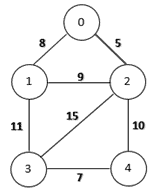

Seleccionamos la arista con menos peso, en este caso, la arista que conecta a 0 con 2.

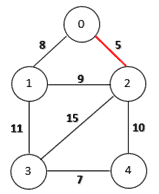

La siguiente arista de menos peso es la 3 - 4

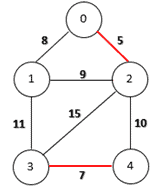

Luego la 0 - 1

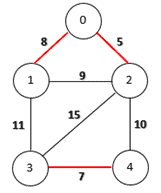

La siguiente con menos peso es la 0 - 2, pero ya que esta genra un ciclo, nos la saltamos.

Tomamos la 2 - 4 y y que todos los nodos están conectados, este es nuestro MST

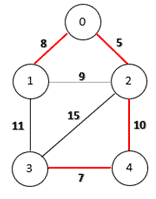

##Visualize == True

Aristas obtenidas

( nodo 2 ) -- 4 -- ( nodo 3 )
( nodo 0 ) -- 5 -- ( nodo 3 )
( nodo 0 ) -- 10 -- ( nodo 1 )

Coste del MST: 19


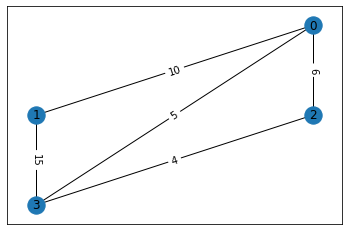

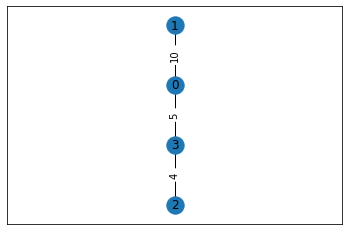

In [20]:

import pydot
from networkx.drawing.nx_pydot import graphviz_layout

visualize = True
verbose = False

g = Graph(4)
g.addEdge(0, 1, 10)
g.addEdge(0, 2, 6)
g.addEdge(0, 3, 5)
g.addEdge(1, 3, 15)
g.addEdge(2, 3, 4)
  
if visualize:
  G = nx.Graph()
  for u, v, weight in g.graph:
          

      G.add_node(u)
      G.add_node(v)
      G.add_edge(u, v, weight = weight)
        
  fig, ax = plt.subplots()
  ax.set_facecolor('white')
  pos = graphviz_layout(G, prog="dot")

  labels = nx.get_edge_attributes(G, 'weight')
  nx.draw_networkx(G, pos)
  nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)

g.KruskalMST(visualize, verbose)

##Verbose == True

In [38]:
def instanceGenerator(V):
  g = Graph(V)
  for i in range(V):
    for j in range(i+1, V):
      g.graph.append([i, j, random.randint(1, 100)])
  
  return g



In [39]:

import pydot
from networkx.drawing.nx_pydot import graphviz_layout

visualize = False
verbose = True

g = Graph(4)
g.addEdge(0, 1, 10)
g.addEdge(0, 2, 6)
g.addEdge(0, 3, 5)
g.addEdge(1, 3, 15)
g.addEdge(2, 3, 4)
  
if visualize:
  G = nx.Graph()
  for u, v, weight in g.graph:
          

      G.add_node(u)
      G.add_node(v)
      G.add_edge(u, v, weight = weight)
        
  fig, ax = plt.subplots()
  ax.set_facecolor('white')
  pos = graphviz_layout(G, prog="dot")

  labels = nx.get_edge_attributes(G, 'weight')
  nx.draw_networkx(G, pos)
  nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)

g.KruskalMST(visualize, verbose)

Conexiones del grafo:

( nodo 0 ) -- 10 -- ( nodo 1 )
( nodo 0 ) -- 6 -- ( nodo 2 )
( nodo 0 ) -- 5 -- ( nodo 3 )
( nodo 1 ) -- 15 -- ( nodo 3 )
( nodo 2 ) -- 4 -- ( nodo 3 )


Grafo ordenado por peso de los vertices:

( nodo 2 ) -- 4 -- ( nodo 3 )
( nodo 0 ) -- 5 -- ( nodo 3 )
( nodo 0 ) -- 6 -- ( nodo 2 )
( nodo 0 ) -- 10 -- ( nodo 1 )
( nodo 1 ) -- 15 -- ( nodo 3 )

Comprobacion de nodos:

Padre ( nodo 2 ) ---- Hijo ( nodo 2 )
Padre ( nodo 3 ) ---- Hijo ( nodo 3 )
Padres distintos, se agrega la arista

Padre ( nodo 0 ) ---- Hijo ( nodo 0 )
Padre ( nodo 3 ) ---- Hijo ( nodo 2 )
Padres distintos, se agrega la arista

Padre ( nodo 0 ) ---- Hijo ( nodo 2 )
Padre ( nodo 2 ) ---- Hijo ( nodo 2 )
Padres iguales, no se agrega la arista

Padre ( nodo 0 ) ---- Hijo ( nodo 2 )
Padre ( nodo 1 ) ---- Hijo ( nodo 1 )
Padres distintos, se agrega la arista



#Correctitud

##Teorema

El algoritmo entrega un árbol de costo mínimo que conecta todos los nodos con arcos, de manera qu no se generen ciclos.

##Prueba del teorema

Para comprobar la correctitud, utilizaremos la propiedad invariante de bucle:

> En cada iteración $i$ del bucle, se tendrá un árbol con ϵ arcos, siendo estos menores a $V-1$, ni que los mismos generen ciclos.

Lo que se quiere conseguir es que el árbol contega $V$ nodos y $V-1$ arcos, y en cada iteración $i$ es un nodo que se revisa.

Kruskal puede utilizar más de un algoritmo para verificar si se generan ciclos, pero en esta implmentación se utilizará *Union-Find*.
###Inicialización

En la iteración $i=1$, se tendrá un árbol vacío y se revisará el arco con menor costo ($i$). Se llama a *UF* (Union-Find), para verificar si hay ciclos al agregar el arco.

> Como se utiliza la primera iteración, no es posible generar ciclos con menos de 3 arcos, pero de igual manera es aplicable para un mayor número de iteración, esto asumiendo que Union-Find sea correcto.

###Mantención

Asumiendo que la inicialización es correcto, consideraremos que $i = x$ es el arco que se busca agregar

    1 < x < V

Tomando lo anterior, se revisa el arco $x$, si los nodos que se encuentran conectado al arco, son parte del mismo sub-conjunto, al agregar ese arco se creará un ciclo, por lo que este no se agregará al árbol. En caso que no se encuentren en el mismo sub-conjunto, si se agrega al árbol.

La operación se realiza con *UF*, especificamente con el *Find*.

> Find genera unos nombres para cada sub-conjunto de nodos, en base a los arcos con los que esten conectados. Los nodos estan previamente ordenados según su costo.

El árbol jamás tendrá más de $V-1$ arcos, ya que en caso contrario, significa que hay un ciclo presente.

Con lo anterior, al finalizar la iteración $i = x+1$ se seguirá cumpliendo la propiedad.

###Conclusión

Como la propiedad es correcta al inicio y final de cada iteración, al finalizar la n-ésima iteración, donde ϵ $= V-1$, se tendrá un árbol con $V$ nodos conectados si ciclos entre si.

#Tiempo de Ejecución

El algoritmo Kruskal posee una complejidad temporal de $O(E*Log(V))$.

Lo anterior se debe al paso a paso del algoritmo, ya que en un comienzo se ordenar los arcos ($E$) según su costo, lo que toma $O(E*Log(E))$.

Luego se revisan los arcos que se puedan conectar, mientras que no se generen ciclos, ni que la cantidad de nodos conectados sea mayor a $V-1$. Para esto se utiliza *Union-Find*, que toma como máximo $O(log(V))$, esta operación se hace para todos los arcos del grafo. La complejidad general de esta parte sería de $O(E*(Log(V))$.

Sumando las 2 operaciones da $O(E*Log(E)) + O(E*Log(V)). Lo que tambien se puede expresar como $O(E*(Log(E) + Log(V) ))$.

> $V$ es la cantidad de nodos del grafo recibido y $E$ es la cantidad de arcos del mismo grafo, y el estimado de estos es que se encuentran entre $V-1 \leq E \leq 2V$

En algunos casos los tiempos de ejecución suelen ser de $O(E) = O(V)$, lo que significa que $O(log(E))$ es igual a $O(Log(V))$.

Lo que significa que la suma de los tiempos de anteriores se pueden simplificar, de manera que quede como:

$O(E*(Log(E) + Log(V) ))$ $=$ $O(E*(2*Log(E)))$.

Lo anterior se puede simplificar aún más, pero para mayor precisión general, la complejidad se deja expresada como $O(E*Log(V))$, ya que aplica para más casos, ya que a veces $E$ llega a ser mucho mayor a $V$

#Experimentos

###Prim

In [51]:
import sys  # Library for INT_MAX
 
 
class Graph2():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    # A utility function to print the constructed MST stored in parent[]
    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])

    def MST(self, parent):
        r = []
        for i in range(1, self.V):
            r.append([parent[i], i, self.graph[i][parent[i]]])
        return r
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minKey(self, key, mstSet):
        # Initialize min value
        min = sys.maxsize
        min_index = -1
 
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
 
        return min_index
 
    # Function to construct and print MST for a graph
    # represented using adjacency matrix representation
    def primMST(self):
 
        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V  # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V
 
        parent[0] = -1  # First node is always the root of
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minKey(key, mstSet)
 
            # Put the minimum distance vertex in
            # the shortest path tree
            mstSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
 
                # graph[u][v] is non zero only for adjacent vertices of m
                # mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u
        
        return self.MST(parent)

def graphToGraph2(G, n):
    g = Graph2(n)

    for u,v,w in G.graph:
        g.graph[u-1][v-1] = w
        g.graph[v-1][u-1] = w

    return g


##Tiempo de ejecución Kruskal

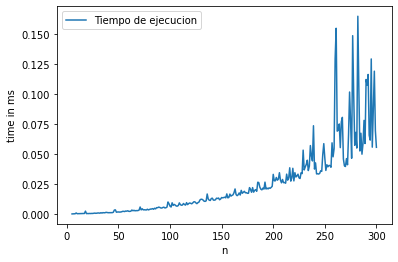

In [80]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

import random

def graph_instance_creator(V):
  graph = []
  for i in range(V):
    for j in range(i+1, V):
      graph.append([i, j, random.randint(1, 500)])
  
  return graph


x=[]; y=[]; 



for n in range(5,301):
  cont = [0]
  g = Graph(n)
  g.graph = graph_instance_creator(n)

  t = repeat(setup = "from __main__ import Graph", stmt = lambda: g.KruskalMST(False, False,False), number = 10, repeat = 1)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["Tiempo de ejecucion"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Se puede ver en el gráfico como el tiempo de ejecución de kruskal es bastante bajo considerando la cantidad de datos que proceso, esto se debe principalmente a que funciona como un algoritmo greedy, lo que significa que funciona en base a lo que parece mejor, lo que le da la capacidad un buen resultado en un corto periodo de tiempo.

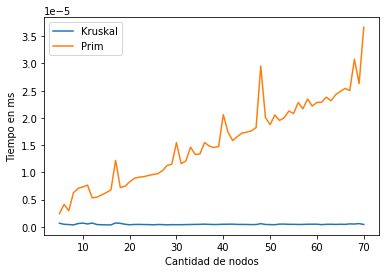

In [79]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(5,71):
    g = Graph(n)
    g.graph = graph_instance_creator(n)
    grafo2 = graphToGraph2(g, n)
    #la función repeat está ejecutando 10 veces Kruskal con el grafo de n nodos y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import Graph", stmt=f"{g.KruskalMST()}", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import Graph2", stmt=f"{grafo2.primMST()}", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Kruskal", "Prim"])

plt.xlabel('Cantidad de nodos')
plt.ylabel('Tiempo en ms')
plt.show()

Se puede ver en la comparativa de los algoritmos, la gran diferencia que existe entre estos, esto se debe principalmente a la diferencia entre tiempo de ejecución de los algoritmos, ya que en el caso de Prim es de $O(v^2)$, mientras que el de kruskal es de $O(E*log(V))$, donde ya se nota la diferencia entre estos, otro punto a dedstacar es que ambos algoritmos estan enfocados en distintos objetivos, ya que kruskal es usado generalmente en grafos dispersos, mientras que Prim es grafos mucho más densos. Y estos al estar enfocados en ciertos casos puede afectar sus rendimientos al enfrenarse a otro problema.